In [128]:
import pandas as pd
import numpy as np
import tweepy
import os
import time
import requests 
import json
import matplotlib.pyplot as plt 
%matplotlib inline

In [129]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Gathering Data

In [130]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url, allow_redirects=True)

In [131]:
open('image_predictions.tsv', 'wb').write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [132]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [133]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [134]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'CONSUMERKEY'
consumer_secret = 'CONSUMERSECRETKEY'
access_token = 'ACCESSTOKEN'
access_secret = 'ACCESSSECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)



In [135]:
# error_list = []
# df_list = []

# start= time.time()

# for tweet_id in twitter_archive['tweet_id']:
#     try:
#         tweet = api.get_status(tweet_id, tweet_mode='extended',
#                                wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
#         favorites = tweet['favorite_count'] 
#         retweets = tweet['retweet_count'] 
#         user_followers = tweet['user']['followers_count']
#         user_favourites = tweet['user']['favourites_count'] 
#         date_time = tweet['created_at'] 
        
#         df_list.append({'tweet_id': int(tweet_id),
#                         'favorites': int(favorites),
#                         'retweets': int(retweets),
#                         'user_followers': int(user_followers),
#                         'user_favourites': int(user_favourites),
#                         'date_time': pd.to_datetime(date_time)})
#     except Exception as e:
#         print(str(tweet_id)+ " _ " + str(e))
#         error_list.append(tweet_id)
        
# end = time.time()
# print(end - start)




The total time was about 4669 seconds = 78 min
Twitter API limit was reached 6 times.
We got 2331 correct tweet_id results and 25 errors.

In [136]:
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36392,7743,8762379,145685,2017-08-01 16:23:56+00:00
1,892177421306343426,31342,5734,8762379,145685,2017-08-01 00:17:27+00:00
2,891815181378084864,23617,3794,8762379,145685,2017-07-31 00:18:03+00:00
3,891689557279858688,39690,7907,8762379,145685,2017-07-30 15:58:51+00:00
4,891327558926688256,37893,8530,8762379,145685,2017-07-29 16:00:24+00:00


In [137]:
tweet_data.duplicated(subset=['retweets']).any()

True

In [138]:
tweet_data.duplicated(subset=['tweet_id']).any()

False

In [139]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [140]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
230,847978865427394560,NaN,NaN,2017-04-01 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Charlie. He fell asleep...,8.323699e+17,4.196984e+09,2017-02-16 23:23:38 +0000,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
1301,707629649552134146,NaN,NaN,2016-03-09 18:10:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate marshmallows but this on...,NaN,NaN,NaN,https://vine.co/v/iHhBOTl5p9z,10,10,None,None,None,None,None
1185,718613305783398402,NaN,NaN,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carper. He's a Tortellini Angiosperm. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718613305...,11,10,Carper,None,None,None,None
1166,722613351520608256,NaN,NaN,2016-04-20 02:30:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Schnitzel. He's a Tropicana Floofboop. Ge...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722613351...,12,10,Schnitzel,None,None,None,None
1421,698195409219559425,NaN,NaN,2016-02-12 17:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None


In [141]:
twitter_archive.loc[twitter_archive['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [142]:
twitter_archive.loc[twitter_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [143]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [144]:
twitter_archive.duplicated(subset=['tweet_id']).any()

False

In [145]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [146]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assessing

### Tidiness

- Combine tweet_data & image_predictions into new df twitter_archive_clean by making copies of originals
- Dog stage can be 1 column instead of 4

### Quality

- Retweets can be removed
- Rows with numerator less than 10 can be dropped
- Rows with denominator not = 10 can be dropped
- Dog name column in twitter_archive_clean needs to be cleaned (None) - keep rows with value != None
- Numerator & denominator should be converted to datatype float
- in_reply_to_status_id & in_reply_to_user_id columns can be dropped
- Tweet_id should be string
- Timestamp needs to be datetime instead of object
- Dog name column needs to be cleaned - 'a' & 'an' values to nan values

## Cleaning

###### Define - To combine tweet_data & image_predictions into new df twitter_archive_clean by making copies of originals

##### Code

In [147]:
tweet_data_clean = tweet_data.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_predictions.copy()

In [148]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='right')



In [149]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, left_on='tweet_id',right_on='tweet_id', how='left')

##### Test

In [150]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [151]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 33 columns):
tweet_id                      2331 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2331 non-null object
source                        2331 non-null object
text                          2331 non-null object
retweeted_status_id           163 non-null float64
retweeted_status_user_id      163 non-null float64
retweeted_status_timestamp    163 non-null object
expanded_urls                 2272 non-null object
rating_numerator              2331 non-null int64
rating_denominator            2331 non-null int64
name                          2331 non-null object
doggo                         2331 non-null object
floofer                       2331 non-null object
pupper                        2331 non-null object
puppo                         2331 non-null object
favorites                     23

###### Define - Make 1 column for dog type:

##### Code

In [152]:
twitter_archive_clean['dog_type'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

##### Test

In [153]:
twitter_archive_clean.dog_type.value_counts()

pupper     263
doggo       90
puppo       36
floofer      4
Name: dog_type, dtype: int64

##### Define - Drop unnecessary rows - retweets, numerators less than 10 & denominators not = 10

###### Code

In [154]:
twitter_archive_clean = twitter_archive_clean[np.isnan(twitter_archive_clean.retweeted_status_id)]

In [155]:
twitter_archive_clean=twitter_archive_clean[(twitter_archive_clean.rating_numerator >= 10)]

In [156]:
twitter_archive_clean=twitter_archive_clean[(twitter_archive_clean.rating_denominator == 10)]

##### Test

In [157]:
twitter_archive_clean.query('retweeted_status_id == retweeted_status_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type


In [158]:
twitter_archive_clean.loc[twitter_archive_clean['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type


In [159]:
twitter_archive_clean.loc[twitter_archive_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type


##### Define - Convert numerator and denominator to data types float from int

###### Code

In [160]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

##### Test

In [161]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 0 to 2325
Data columns (total 34 columns):
tweet_id                      1720 non-null int64
in_reply_to_status_id         62 non-null float64
in_reply_to_user_id           62 non-null float64
timestamp                     1720 non-null object
source                        1720 non-null object
text                          1720 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1675 non-null object
rating_numerator              1720 non-null float64
rating_denominator            1720 non-null float64
name                          1720 non-null object
doggo                         1720 non-null object
floofer                       1720 non-null object
pupper                        1720 non-null object
puppo                         1720 non-null object
favorites                     1720

##### Define - Drop name values=None by keeping only the values != None

###### Code

In [162]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.name != "None"]

##### Test

In [163]:
twitter_archive_clean.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type


##### Define - Drop in_reply_to_status_id & in_reply_to_user_id

###### Code

In [164]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

##### Test

In [165]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193 entries, 0 to 2325
Data columns (total 32 columns):
tweet_id                      1193 non-null int64
timestamp                     1193 non-null object
source                        1193 non-null object
text                          1193 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1193 non-null object
rating_numerator              1193 non-null float64
rating_denominator            1193 non-null float64
name                          1193 non-null object
doggo                         1193 non-null object
floofer                       1193 non-null object
pupper                        1193 non-null object
puppo                         1193 non-null object
favorites                     1193 non-null int64
retweets                      1193 non-null int64
user_followers                1193

In [166]:
print(twitter_archive_clean.dog_type.value_counts())
print(len(twitter_archive_clean))

pupper     104
doggo       39
puppo       18
floofer      2
Name: dog_type, dtype: int64
1193


##### Define - Convert tweet_id & source to string

###### Code

In [167]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

In [168]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype(str)

###### Define - Convert timestamp to datetime format

###### Code

In [169]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [170]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193 entries, 0 to 2325
Data columns (total 32 columns):
tweet_id                      1193 non-null object
timestamp                     1193 non-null datetime64[ns, UTC]
source                        1193 non-null object
text                          1193 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1193 non-null object
rating_numerator              1193 non-null float64
rating_denominator            1193 non-null float64
name                          1193 non-null object
doggo                         1193 non-null object
floofer                       1193 non-null object
pupper                        1193 non-null object
puppo                         1193 non-null object
favorites                     1193 non-null int64
retweets                      1193 non-null int64
user_followers      

###### Define - Replace name values 'a' & 'an' with nan

###### Code

In [171]:
print(twitter_archive_clean.name.value_counts())

a          29
Charlie    10
Lucy        9
Oliver      9
Cooper      9
           ..
Aqua        1
Keurig      1
Oddie       1
Darla       1
Barclay     1
Name: name, Length: 811, dtype: int64


In [172]:
twitter_archive_clean.name.replace(['a', 'an'], np.nan, inplace=True)

In [173]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


##### Test 

In [174]:
(twitter_archive_clean.name == 'a').any()

False

In [175]:
(twitter_archive_clean.name == 'an').any()

False

#### To save data to twitter_archive_master csv file:

In [176]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

# Analyze & Visualize Data: 

In [177]:
import seaborn as sns
df1=pd.read_csv('twitter_archive_master.csv')

In [178]:
 df1.head()

,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [179]:
df1['tweet_id'] = df1['tweet_id'].astype(object)
df1['timestamp'] = pd.to_datetime(df1.timestamp)
df1['dog_type'] = df1['dog_type'].astype('category')
df1.set_index('timestamp', inplace=True)

In [180]:
df1.describe()

,Unnamed: 0,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,favorites,retweets,user_followers,user_favourites,img_num,p1_conf,p2_conf,p3_conf
count,1193.000000,0.0,0.0,0.0,1193.000000,1193.0,1193.000000,1193.000000,1.193000e+03,1193.000000,1148.000000,1148.000000,1.148000e+03,1.148000e+03
mean,1038.029338,NaN,NaN,NaN,12.955574,10.0,9837.100587,2774.471920,8.762401e+06,145685.338642,1.247387,0.613052,1.340359e-01,5.961173e-02
std,648.805160,NaN,NaN,NaN,51.133139,0.0,11930.062739,3942.562166,2.716830e+01,0.749266,0.620587,0.267681,1.009713e-01,5.152540e-02
min,0.000000,NaN,NaN,NaN,10.000000,10.0,115.000000,38.000000,8.762253e+06,145685.000000,1.000000,0.055379,1.011300e-08,1.740170e-10
25%,488.000000,NaN,NaN,NaN,10.000000,10.0,2587.000000,751.000000,8.762382e+06,145685.000000,1.000000,0.380834,4.988695e-02,1.523955e-02
50%,987.000000,NaN,NaN,NaN,11.000000,10.0,5959.000000,1686.000000,8.762403e+06,145685.000000,1.000000,0.610731,1.202710e-01,4.853980e-02
75%,1546.000000,NaN,NaN,NaN,12.000000,10.0,12934.000000,3326.000000,8.762416e+06,145685.000000,1.000000,0.868584,1.968320e-01,9.152147e-02
max,2325.000000,NaN,NaN,NaN,1776.000000,10.0,121337.000000,57076.000000,8.762439e+06,145688.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


### Scatter Plot of Retweets vs. Favorites

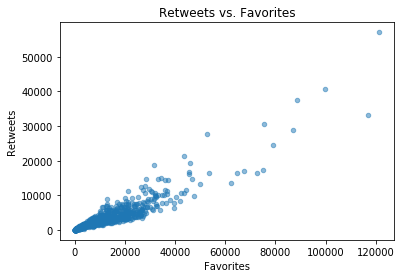

In [181]:

df1.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets vs. Favorites');

Below is a scatterplot showing the correlation between retweets and favorites. The scatter plot reveals that retweets and favorites show a strong positive correlation. Most of the data is concentrated around 30,000 favorites and under and 20,000 retweets and under.

### Bar Chart of most popular dog names

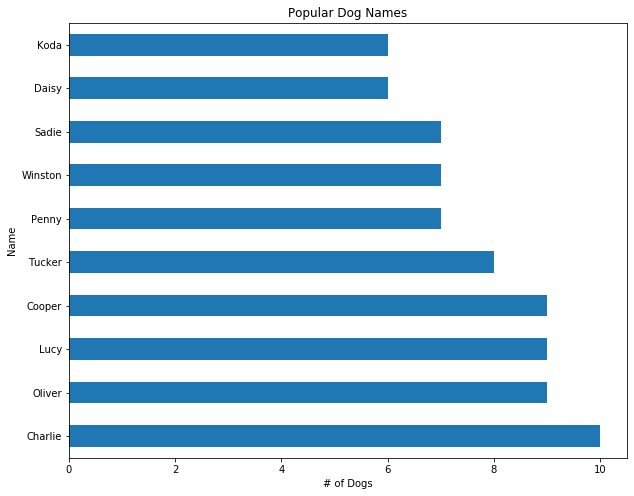

In [182]:
df1.name.value_counts()[:10].plot(kind='barh',figsize=(10,8))
plt.xlabel('# of Dogs')
plt.ylabel('Name')
plt.title('Popular Dog Names');

According to the data, Charlie is the most popular dog name followed by the names Lucy, Cooper, and Oliver where there are 9 dogs each having those names. 

### Line Chart Showing Favorites Count over Time

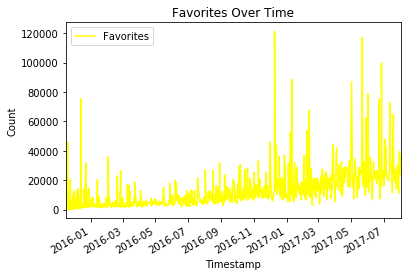

In [183]:
df1['favorites'].plot(color = 'yellow', label='Favorites')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Favorites Over Time');

Here we have a graph displaying favorites count over time. Favorites counts were generally stable throughout most of 2016 & peaked around late December of 2016 & early January of 2017 reaching about 120,000 favorites. The numbers jumped and fell starting in May 2017 to July 2017 and onwards.

### Correlation Heat Map of Selected Columns

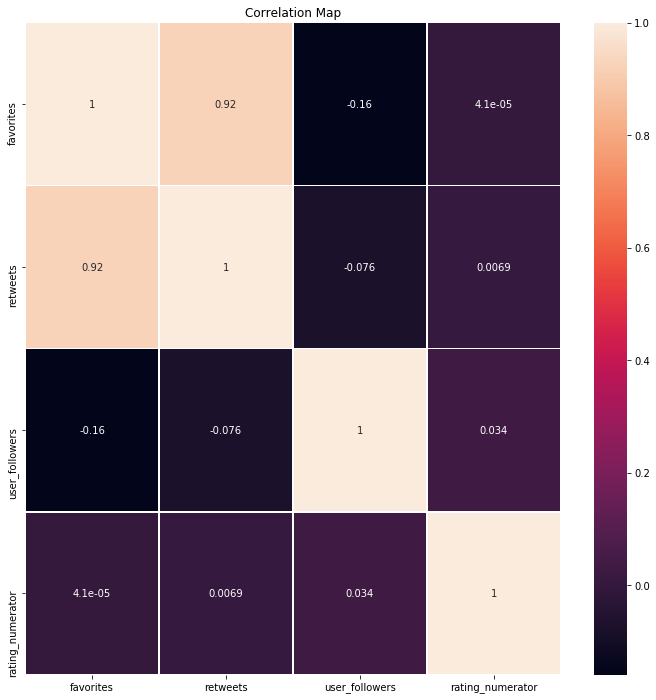

In [184]:
corr_matrix = df1.corr()
plt.figure(figsize=(12,12))
heat_map = sns.heatmap(df1[['favorites','retweets',
                'user_followers','rating_numerator']].corr(), annot=True, linewidths=.5)
bottom, top = heat_map.get_ylim()
heat_map.set_ylim(bottom + 0.5, top - 0.5);
plt.title('Correlation Map');


The strongest correlation according to the heat map is between retweets and favorites.